In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random
from scipy import optimize

#A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'

2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'. 
Note que al final el DataFrame debe quedar con tres columnas adicionales

3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione la fila con el índice correspondiente a ese número entero  y con base en la columna '`solution`': construya un polinomio con esa lista de enteros como coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: 
* el polinomio generado, sus raices (como puntos en el gráfico) y la derivada del polinomio. 
* Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). 
* Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


In [ ]:
#Se crea el DataFrame

df = pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [ ]:
df['smax'] = df.solution.apply(lambda x: max(list(map(abs,x)))) #Se aplica el valor absoluto a cada lista en la columna solution
df['sum_s'] = df.solution.apply(lambda x: sum(list(map(int,x)))) #Luego, se suman los elementos de cada lista en la columna solution
df['sum_s³'] = df.sum_s.apply(lambda x: x**3)  #Una vez creada la columna sum_s se le aplica la función cúbica a cada elemento de dicha columna
df   #Visualizamos el nuevo DataFrame

,l,k,solution,gcd,n,smax,sum_s,sum_s³
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


In [ ]:
#Creamos el número aleatorio

random.seed(1017270713)
random.randint(0, 390073)

307721

In [ ]:
#Definimos los coeficientes del polinomio

coeficientes = df.iloc[307721]['solution']

In [ ]:
#Construimos el polinomio

poly = np.poly1d( coeficientes, variable = 'x' )
print(poly)

   10     9     8     7     6      5      4      3      2
2 x  + 4 x + 7 x - 9 x - 9 x - 10 x + 17 x + 22 x - 25 x - 26 x + 27


In [ ]:
#Construimos la derivada del polinomio

dpoly = poly.deriv()
print(dpoly)

    9      8      7      6      5      4      3      2
20 x + 36 x + 56 x - 63 x - 54 x - 50 x + 68 x + 66 x - 50 x - 26


In [ ]:
#Buscamos todas las raíces del polinomio

roots = np.roots(poly)
roots

array([-1.27562701+1.81178797j, -1.27562701-1.81178797j,
       -0.46263109+1.45104731j, -0.46263109-1.45104731j,
       -1.02228002+0.41003082j, -1.02228002-0.41003082j,
        0.77129391+0.63536062j,  0.77129391-0.63536062j,
        1.        +0.j        ,  0.97848841+0.j        ])

In [ ]:
#Seleccionamos las raíces reales

real_roots = [1.0000000000000087,0.978488412671267]

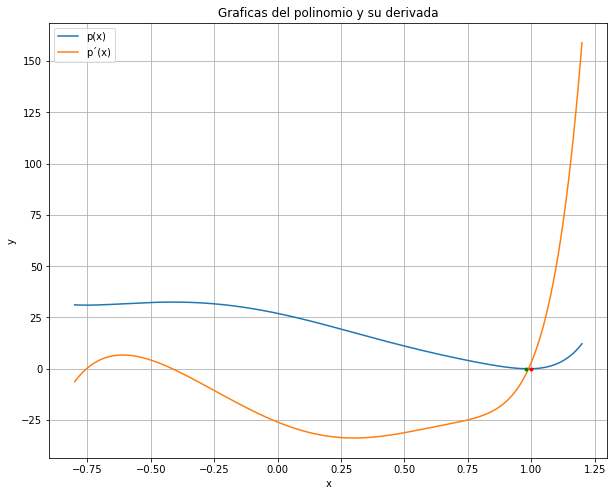

In [ ]:
#Graficación 

plt.figure( figsize = (10,8) )
X = np.linspace(-0.8,1.2,1000)   #Definimos el espacio de mapeo
plt.plot(X,poly(X), label = 'p(x)')   #Graficación del polinomio
plt.plot(X, dpoly(X), label = 'p´(x)' ) #Graficación de la derivada del polinomio
plt.plot(1.0000000000000087, poly(1.0000000000000087), 'r.') #Graficación de la primera raíz
plt.plot(0.978488412671267, poly(0.978488412671267), 'g.') #Graficación de la segunda raíz
plt.legend()   #Rotulación
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graficas del polinomio y su derivada')
plt.grid(True)

#B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$

III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$

IV) Encuentre las soluciones a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [ ]:
#Generación del número aleatorio

random.seed(1017270713)
random.randint(1,5)

5

In [ ]:
#Se me asigna f(x) = cosx/x + p

p = random.random()

In [250]:
#Se define la función

f = lambda x: np.cos(x)/x + p

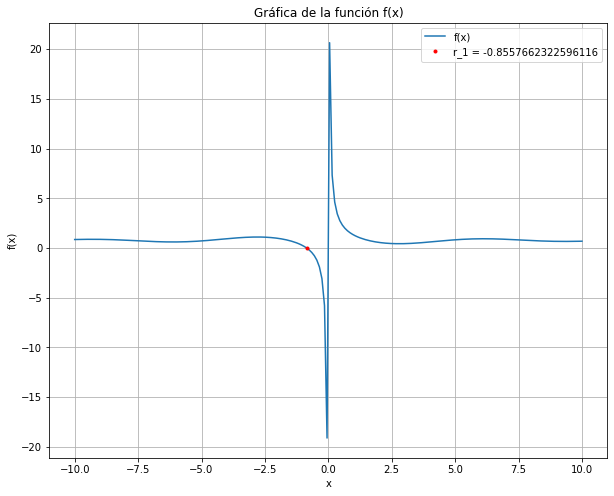

In [253]:
#Graficación

plt.figure( figsize = (10,8) )
X_1 = np.linspace( -10, 10, 200 )  #Definimos el espacio de mapeo
plt.plot( X_1, f(X_1), label = 'f(x)' ) #Graficamos la función
plt.plot( r_1, f(r_1), 'r.', label = f'r_1 = {r_1}' ) #Graficamos la raíz
plt.legend()
plt.xlabel('x')
plt.ylabel( 'f(x)' )
plt.title('Gráfica de la función f(x)')
plt.grid(True)

In [252]:
#Definimos la raíz

r_1 = optimize.bisect(f, -2, -0.5)
r_1

-0.8557662322596116